In [1]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from ast import literal_eval
import plotly_express as px
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os

import eta_tools

/Users/amikano/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Handmade package 'eta_tools' successfully imported.


In [2]:
cwd = os.getcwd()

DOC = pd.read_csv(cwd+"/output/DOC.csv")
LIB = pd.read_csv(cwd+"/output/LIB.csv")
VOCAB = pd.read_csv(cwd+"/output/VOCAB.csv")

In [3]:
DOC

review_id  sent_id  token_id  \
0       Twelfth Night is a New Perspective at the Nati...        0         0   
1       Twelfth Night is a New Perspective at the Nati...        0         1   
2       Twelfth Night is a New Perspective at the Nati...        0         2   
3       Twelfth Night is a New Perspective at the Nati...        0         3   
4       Twelfth Night is a New Perspective at the Nati...        0         4   
...                                                   ...      ...       ...   
283694              ART's Julius Caesar Swings and Misses       37        20   
283695              ART's Julius Caesar Swings and Misses       37        21   
283696              ART's Julius Caesar Swings and Misses       37        22   
283697              ART's Julius Caesar Swings and Misses       37        23   
283698              ART's Julius Caesar Swings and Misses       37        24   

             term_str                pos_tuple  pos  
0              golden         ('golden', 'JJ')   JJ  
1               brown          ('brown', 'NN')   NN  
2              leaves        ('leaves', 'VBZ')  VBZ  
3            decorate      ('decorate', 'VBP')  VBP  
4                 the            ('the', 'DT')   DT  
...               ...                      ...  ...  
283694            not            ('not', 'RB')   RB  
283695             at             ('at', 'IN')   IN  
283696              a              ('a', 'DT')   DT  
283697  disassociated  ('disassociated', 'JJ')   JJ  
283698       distance       ('distance', 'NN')   NN  

[283699 rows x 6 columns]

In [4]:
LIB

Original Work                                       Review Title  \
0    Twelfth Night  Twelfth Night is a New Perspective at the Nati...   
1    Twelfth Night   Twelfth Night Offers Clarity with Complications    
2    Twelfth Night  Twelfth Night Goes for Synthesis through Antit...   
3    Twelfth Night  Shakespeare Set in the Summer of Love: "There'...   
4    Twelfth Night                  Big Things Come in Small Packages   
..             ...                                                ...   
287  Julius Caesar  Boredom from Julius Caesar? NYC Buries Pigeon ...   
288  Julius Caesar                  Stars Rise as Mighty Caesar Falls   
289  Julius Caesar                                 An American Caesar   
290  Julius Caesar      Julius Caesar Takes a Stab at the Shakespeare   
291  Julius Caesar              ART's Julius Caesar Swings and Misses   

            Review Author                                            Content  \
0       Christopher Adams  golden brown leaves decorate the edges of the ...   
1    Claudine Nightingale   ive been eagerly awaiting the arrival of  dor...   
2         Denise Battista  hear ye hear ye  at stinson beach is now north...   
3         Denise Battista  i was born in the 70s but that doesnt mean i w...   
4       Carrie Cleaveland  city lits production of twelfth night proves t...   
..                    ...                                                ...   
287        Roseanne Wells  pigeon creek  company which originally hails f...   
288       Denise Battista  in s   the plot is simple.   is an ambitious p...   
289      Michael Kostroff   if youve never seen a play at theatricum bota...   
290   Georgina Petronella    is the first  play i ever read so perhaps it...   
291            Jess Pease  although its sometimes hard to imagine in many...   

     Overall Rating    Genre Rating Category  
0                 3   Comedy        Negative  
1                 4   Comedy        Positive  
2                 4   Comedy        Positive  
3                 5   Comedy        Positive  
4                 4   Comedy        Positive  
..              ...      ...             ...  
287               1  Tragedy        Negative  
288               4  Tragedy        Positive  
289               4  Tragedy        Positive  
290               4  Tragedy        Positive  
291               2  Tragedy        Negative  

[292 rows x 7 columns]

In [5]:
lib_og_count = LIB["Original Work"].value_counts()
lib_og_count.to_csv(cwd+'/output/lib_og_count.csv')
lib_og_count

Midsummer Night's Dream      50
Hamlet                       40
Macbeth                      39
Twelfth Night                37
Romeo & Juliet               36
As You Like It               26
All's Well That Ends Well    19
Julius Caesar                19
Love's Labour's Lost         13
Othello                      13
Name: Original Work, dtype: int64

In [6]:
lib_genre_count = LIB["Genre"].value_counts()
lib_genre_count.to_csv(cwd+'/output/lib_genre_count.csv')
lib_genre_count

Tragedy    147
Comedy     145
Name: Genre, dtype: int64

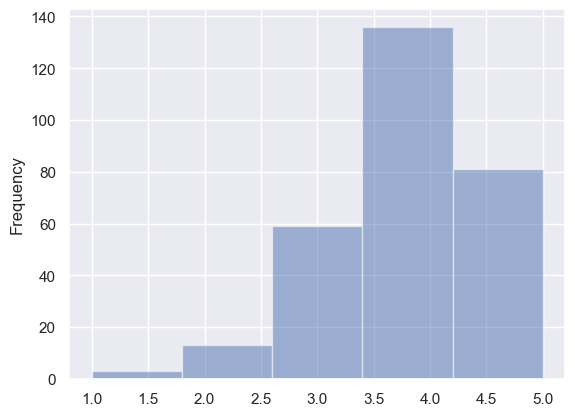

In [7]:
LIB["Overall Rating"].plot.hist(bins=5, alpha=0.5);

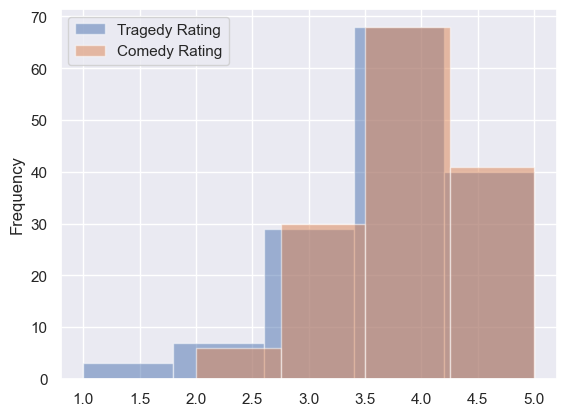

In [8]:
fig, ax = plt.subplots()
LIB[LIB.Genre=="Tragedy"]["Overall Rating"].to_frame("Tragedy Rating")\
                .reset_index().drop("index", axis=1).plot.hist(bins=5, alpha=0.5, ax=ax)
LIB[LIB.Genre=="Comedy"]["Overall Rating"].to_frame("Comedy Rating")\
                .reset_index().drop("index", axis=1).plot.hist(bins=4, alpha=0.5, ax=ax);

fig.savefig(cwd+'/output/images/rating_histogram.png')

In [9]:
VOCAB = VOCAB.set_index('term_str')

In [10]:
VOCAB.sort_values('n', ascending=False)

n  n_chars         p          i max_pos
term_str                                                  
the            19206        3  0.067699   3.884732      DT
and            10393        3  0.036634   4.770677      CC
of              8942        2  0.031519   4.987620      IN
a               7694        1  0.027120   5.204483      DT
to              6428        2  0.022658   5.463847      TO
...              ...      ...       ...        ...     ...
intoning           1        8  0.000004  18.114002     VBG
intoxicated        1       11  0.000004  18.114002     VBN
intoxicating       1       12  0.000004  18.114002     VBG
intransigence      1       13  0.000004  18.114002     VBP
à                  1        1  0.000004  18.114002     NNP

[23281 rows x 5 columns]

## Topic Modeling

In [11]:
noun_verb = ["NN", "NNS", 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']  

In [12]:
DOC = DOC[DOC.pos.isin(noun_verb)]
VOCAB = VOCAB[VOCAB.max_pos.isin(noun_verb)]

In [13]:
model = eta_tools.topic_model(DOC, 20)

In [14]:
model.topics.to_csv(cwd+'/output/topic.csv')

model.topics.sort_values("term_freq", ascending=False).head(5)

term_str           0             1           2           3         4  \
topic_id                                                               
T09            scene          play       stage    audience      seen   
T17           design           set        play  set design  costumes   
T06            stage         plays         set    audience     scene   
T19       production       playing      actors     company   theatre   
T13             play  performances  production      actors     scene   

term_str           5         6  \
topic_id                         
T09            ghost    speech   
T17       production  lighting   
T06       production      left   
T19            scene     woman   
T13         audience      hand   

term_str                                              label  doc_weight_sum  \
topic_id                                                                      
T09       T09 scene, play, stage, audience, seen, ghost,...      629.422929   
T17       T17 design, set, play, set design, costumes, p...      618.458229   
T06       T06 stage, plays, set, audience, scene, produc...      643.872979   
T19       T19 production, playing, actors, company, thea...      630.159550   
T13       T13 play, performances, production, actors, sc...      641.262360   

term_str  term_freq  
topic_id             
T09        0.055808  
T17        0.054598  
T06        0.054382  
T19        0.053430  
T13        0.053328

In [15]:
negative_review = list(LIB[LIB["Rating Category"]=='Negative']["Review Title"])

model_low_rating = eta_tools.topic_model(DOC[DOC["review_id"].isin(negative_review)], 5)
# model_low_rating.topics.sort_values("term_freq", ascending=False)
model_low_rating.topics

term_str            0           1           2           3          4  \
topic_id                                                               
T0               play  production       plays        time       text   
T1        performance        cast  production      actors   audience   
T2              stage  production    audience       scene     scenes   
T3         production        play       dream  characters  midsummer   
T4              stage  production        play    audience       love   

term_str           5      6  \
topic_id                      
T0        characters   does   
T1              play   does   
T2               set   play   
T3           company  stage   
T4            actors    set   

term_str                                              label  doc_weight_sum  \
topic_id                                                                      
T0        T0 play, production, plays, time, text, charac...      583.950797   
T1        T1 performance, cast, production, actors, audi...      586.848792   
T2        T2 stage, production, audience, scene, scenes,...      691.446767   
T3        T3 production, play, dream, characters, midsum...      574.487415   
T4        T4 stage, production, play, audience, love, ac...      567.266229   

term_str  term_freq  
topic_id             
T0         0.190359  
T1         0.192332  
T2         0.244240  
T3         0.186676  
T4         0.186392

In [16]:
positive_review = list(LIB[LIB["Rating Category"]=='Positive']["Review Title"])

model_high_rating = eta_tools.topic_model(DOC[DOC["review_id"].isin(positive_review)], 5)
# model_high_rating.topics.sort_values("term_freq", ascending=False)
model_high_rating.topics

term_str           0            1           2         3         4          5  \
topic_id                                                                       
T0             stage  performance  production  audience      play       love   
T1              play   production        love  audience     scene      stage   
T2          audience        plays       stage   costume     dream  midsummer   
T3               set   production        play    design     stage     played   
T4        production         play       scene      role  audience   director   

term_str           6                                              label  \
topic_id                                                                  
T0              time  T0 stage, performance, production, audience, p...   
T1              cast  T1 play, production, love, audience, scene, st...   
T2        production  T2 audience, plays, stage, costume, dream, mid...   
T3          audience  T3 set, production, play, design, stage, playe...   
T4              time  T4 production, play, scene, role, audience, di...   

term_str  doc_weight_sum  term_freq  
topic_id                             
T0           1729.045262   0.189528  
T1           1952.736179   0.220021  
T2           1619.244273   0.179716  
T3           1677.694027   0.189552  
T4           1987.280259   0.221183

## Sentiment Analysis

In [17]:
emo_cols = "anger anticipation disgust fear joy sadness surprise sentiment".split()

In [18]:
SALEX = pd.read_csv(cwd+"/salex_nrc.csv").set_index('term_str')
SALEX.columns = [col.replace('nrc_','') for col in SALEX.columns]
SALEX = SALEX.drop("trust", axis=1)

In [19]:
V = pd.concat([VOCAB.reset_index().set_index('term_str'), SALEX], join='inner', axis=1)

In [20]:
tfidf = eta_tools.TFIDF(eta_tools.BOW(DOC))[0].stack().to_frame('tfidf')

In [21]:
B = tfidf.join(V[emo_cols], on='term_str', rsuffix='_v').dropna()
B = B.reset_index().join(LIB[['Review Title', "Genre", "Original Work", 
                              "Review Author", "Overall Rating", "Rating Category"]]\
                         .set_index("Review Title"), on="review_id")

for col in emo_cols:
    B[col] = B[col] * B.tfidf

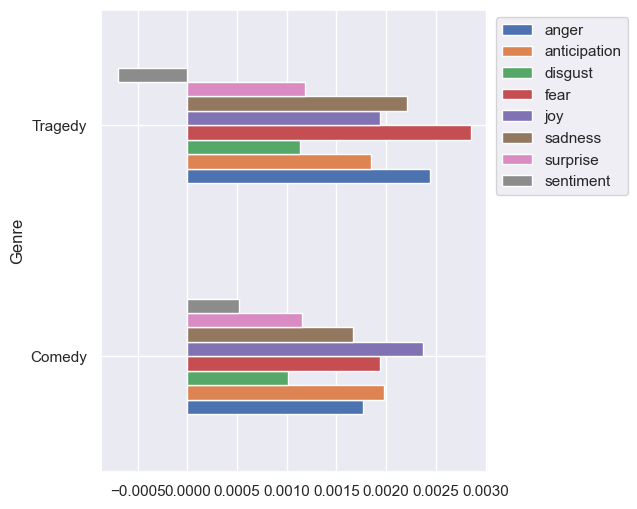

In [22]:
EMO_genre = B.groupby(['Genre'])[emo_cols].mean()

fig, ax = plt.subplots(1)
EMO_genre.plot.barh(figsize=(5,6), ax=ax).legend(bbox_to_anchor=(1.0, 1.0));
fig.savefig(cwd+'/output/images/sentiment_genre.png')

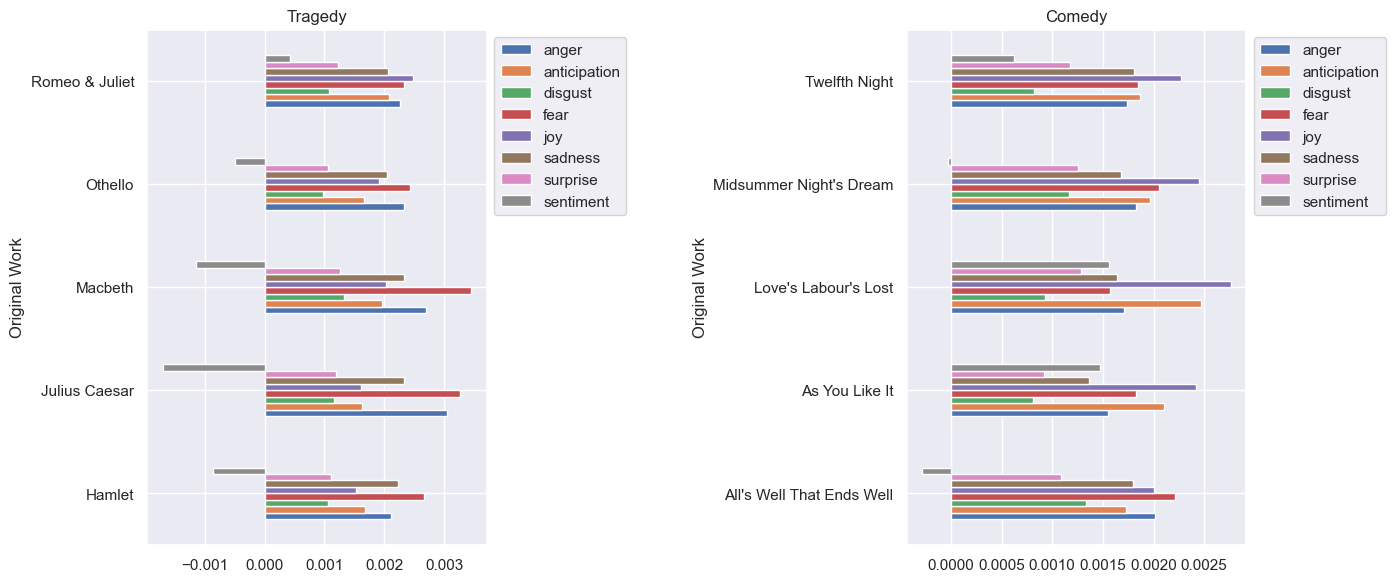

In [23]:
EMO_tragedy_work = B[B.Genre=="Tragedy"].groupby(["Original Work"])[emo_cols].mean()
EMO_comedy_work = B[B.Genre=="Comedy"].groupby(["Original Work"])[emo_cols].mean()

fig, (ax, ax2) = plt.subplots(ncols=2)
fig.tight_layout(pad=6.0)
EMO_tragedy_work.plot.barh(figsize=(18,10), title="Tragedy", ax=ax).legend(bbox_to_anchor=(1.0, 1.0))
EMO_comedy_work.plot.barh(figsize=(18,10), title="Comedy", ax=ax2).legend(bbox_to_anchor=(1.0, 1.0));
fig.savefig(cwd+'/output/images/sentiment_title_genre.png')

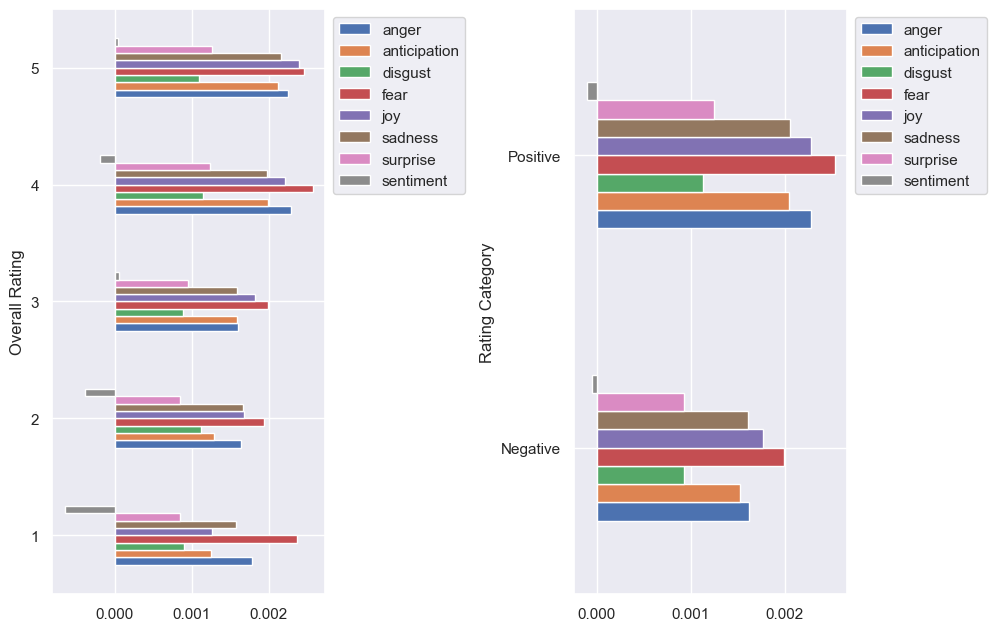

In [24]:
EMO_rating = B.groupby(['Overall Rating'])[emo_cols].mean()
EMO_act_rating = B.groupby(['Rating Category'])[emo_cols].mean()

fig, (ax, ax2) = plt.subplots(ncols=2)
fig.tight_layout(pad=5.0)
EMO_rating.plot.barh(figsize=(12,10), ax=ax).legend(bbox_to_anchor=(1.0, 1.0))
EMO_act_rating.plot.barh(figsize=(12,10), ax=ax2).legend(bbox_to_anchor=(1.0, 1.0));
fig.savefig(cwd+'/output/images/sentiment_rating.png')

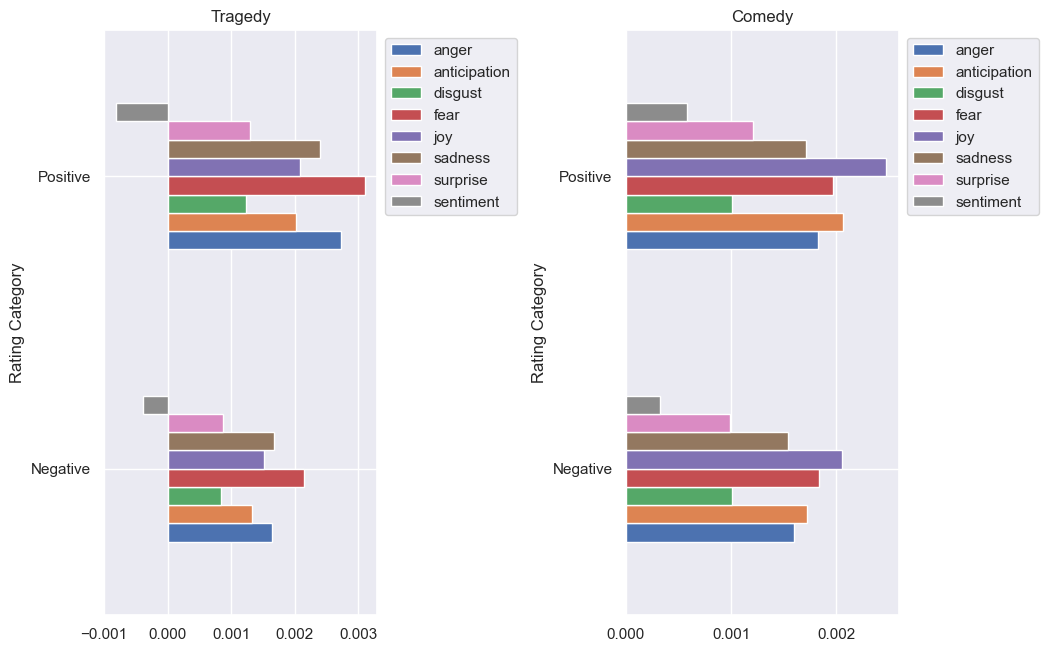

In [25]:
EMO_tragedy_rating = B[B.Genre=="Tragedy"].groupby(["Rating Category"])[emo_cols].mean()
EMO_comedy_rating = B[B.Genre=="Comedy"].groupby(["Rating Category"])[emo_cols].mean()

fig, (ax, ax2) = plt.subplots(ncols=2)
fig.tight_layout(pad=5.0)
EMO_tragedy_rating.plot.barh(figsize=(12,10), title="Tragedy", ax=ax).legend(bbox_to_anchor=(1.0, 1.0))
EMO_comedy_rating.plot.barh(figsize=(12,10), title="Comedy", ax=ax2).legend(bbox_to_anchor=(1.0, 1.0));
fig.savefig(cwd+'/output/images/sentiment_rating_genre.png')

## PCA

In [26]:
tfidf, dfidf = eta_tools.TFIDF(eta_tools.BOW(DOC))

VOCAB = VOCAB.join(dfidf.to_frame("dfidf"), on="term_str")

top_nouns = VOCAB[VOCAB["max_pos"].isin(["NN", "NNS"])].sort_values("dfidf", ascending=False).head(1000).index

reduced_tfidf = tfidf[top_nouns.values]

reduced_tfidf

term_str                                            performances     story  \
review_id                                                                    
 A Decisive Hamlet in a Post-colonial World             0.000000  0.114568   
"As You Like It" Amiable at the Folger                  0.000000  0.000000   
"As You Like It" As It Should Be                        0.000000  0.156777   
80s Throwback is a Dream                                0.000000  0.000000   
A Beautiful Bard Ballet                                 0.295116  0.297877   
...                                                          ...       ...   
Witch's View                                            0.134144  0.000000   
Witches Rule in Macbeth's Court                         0.000000  0.000000   
Words, words, words...although not as many as y...      0.105399  0.000000   
Youthful and Musical Twelfth Night at the PST           0.086799  0.000000   
iHamlet at the Philly Fringe                            0.000000  0.000000   

term_str                                               sense  designer  \
review_id                                                                
 A Decisive Hamlet in a Post-colonial World         0.000000  0.000000   
"As You Like It" Amiable at the Folger              0.000000  0.000000   
"As You Like It" As It Should Be                    0.158245  0.000000   
80s Throwback is a Dream                            0.000000  0.000000   
A Beautiful Bard Ballet                             0.000000  0.000000   
...                                                      ...       ...   
Witch's View                                        0.000000  0.000000   
Witches Rule in Macbeth's Court                     0.000000  0.000000   
Words, words, words...although not as many as y...  0.000000  0.000000   
Youthful and Musical Twelfth Night at the PST       0.088431  0.088431   
iHamlet at the Philly Fringe                        0.107380  0.000000   

term_str                                                text  something  \
review_id                                                                 
 A Decisive Hamlet in a Post-colonial World         0.000000   0.000000   
"As You Like It" Amiable at the Folger              0.049374   0.111462   
"As You Like It" As It Should Be                    0.000000   0.000000   
80s Throwback is a Dream                            0.000000   0.000000   
A Beautiful Bard Ballet                             0.000000   0.000000   
...                                                      ...        ...   
Witch's View                                        0.000000   0.000000   
Witches Rule in Macbeth's Court                     0.000000   0.082130   
Words, words, words...although not as many as y...  0.000000   0.111462   
Youthful and Musical Twelfth Night at the PST       0.000000   0.000000   
iHamlet at the Philly Fringe                        0.197496   0.000000   

term_str                                               world     roles  \
review_id                                                                
 A Decisive Hamlet in a Post-colonial World         0.120036  0.000000   
"As You Like It" Amiable at the Folger              0.055731  0.000000   
"As You Like It" As It Should Be                    0.000000  0.082901   
80s Throwback is a Dream                            0.000000  0.000000   
A Beautiful Bard Ballet                             0.000000  0.000000   
...                                                      ...       ...   
Witch's View                                        0.000000  0.000000   
Witches Rule in Macbeth's Court                     0.000000  0.165802   
Words, words, words...although not as many as y...  0.000000  0.000000   
Youthful and Musical Twelfth Night at the PST       0.000000  0.000000   
iHamlet at the Philly Fringe                        0.000000  0.000000   

term_str                                               place       act  ...  \
revi

In [27]:
loadings, dcm, compinf = eta_tools.PCA(X=reduced_tfidf, 
                              k=10, 
                              norm_docs=True, 
                              center_by_mean=False,
                              center_by_variance=False)

In [28]:
dcm  = dcm.join(LIB[['Review Title', "Genre", "Original Work", "Review Author", "Rating Category"]]\
                .set_index("Review Title"), on="review_id")

dcm.to_csv(cwd+'/output/pca_dcm.csv')
loadings.to_csv(cwd+'/output/pca_loadings.csv')
compinf.to_csv(cwd+'/output/pca_compinf.csv')

dcm

PC0       PC1  \
review_id                                                                
 A Decisive Hamlet in a Post-colonial World        -0.271654  0.114140   
"As You Like It" Amiable at the Folger             -0.366173 -0.009997   
"As You Like It" As It Should Be                   -0.379025  0.042714   
80s Throwback is a Dream                           -0.289995 -0.209615   
A Beautiful Bard Ballet                            -0.220282  0.011699   
...                                                      ...       ...   
Witch's View                                       -0.245229  0.140064   
Witches Rule in Macbeth's Court                    -0.309635  0.160427   
Words, words, words...although not as many as y... -0.257462  0.024593   
Youthful and Musical Twelfth Night at the PST      -0.333156  0.082394   
iHamlet at the Philly Fringe                       -0.288766  0.060787   

                                                         PC2       PC3  \
review_id                                                                
 A Decisive Hamlet in a Post-colonial World        -0.098327 -0.013923   
"As You Like It" Amiable at the Folger              0.199782  0.147209   
"As You Like It" As It Should Be                    0.055884  0.043206   
80s Throwback is a Dream                           -0.003834 -0.014149   
A Beautiful Bard Ballet                            -0.034688  0.128130   
...                                                      ...       ...   
Witch's View                                       -0.241304 -0.269853   
Witches Rule in Macbeth's Court                    -0.236776 -0.305553   
Words, words, words...although not as many as y... -0.012432  0.067094   
Youthful and Musical Twelfth Night at the PST       0.290748 -0.108354   
iHamlet at the Philly Fringe                       -0.019479  0.029150   

                                                         PC4       PC5  \
review_id                                                                
 A Decisive Hamlet in a Post-colonial World        -0.034263  0.035202   
"As You Like It" Amiable at the Folger             -0.279003 -0.222039   
"As You Like It" As It Should Be                   -0.081054 -0.003398   
80s Throwback is a Dream                            0.013918  0.010278   
A Beautiful Bard Ballet                             0.045275  0.081220   
...                                                      ...       ...   
Witch's View                                       -0.037136 -0.093196   
Witches Rule in Macbeth's Court                    -0.032883 -0.083879   
Words, words, words...although not as many as y...  0.022648  0.054749   
Youthful and Musical Twelfth Night at the PST       0.148433 -0.120272   
iHamlet at the Philly Fringe                        0.041360  0.059516   

                                                         PC6       PC7  \
review_id                                                                
 A Decisive Hamlet in a Post-colonial World         0.006242  0.026113   
"As You Like It" Amiable at the Folger             -0.214147  0.145014   
"As You Like It" As It Should Be                    0.002485  0.080087   
80s Throwback is a Dream                           -0.054072  0.021513   
A Beautiful Bard Ballet                             0.016956  0.108803   
...                                                      ...       ...   
Witch's View                                       -0.159444 -0.137983   
Witches Rule in Macbeth's Court                    -0.190273 -0.045046   
Words, words, words...although not as many as y... -0.047227  0.017414   
Youthful and Musical Twelfth Night at the PST       0.177590 -0.030283   
iHamlet at the Philly Fringe                        0.045970  0.064244   

                                                         PC8       PC9  \
review_id                                                                
 A Decisive Hamlet in a Post-colonial World        -0.126

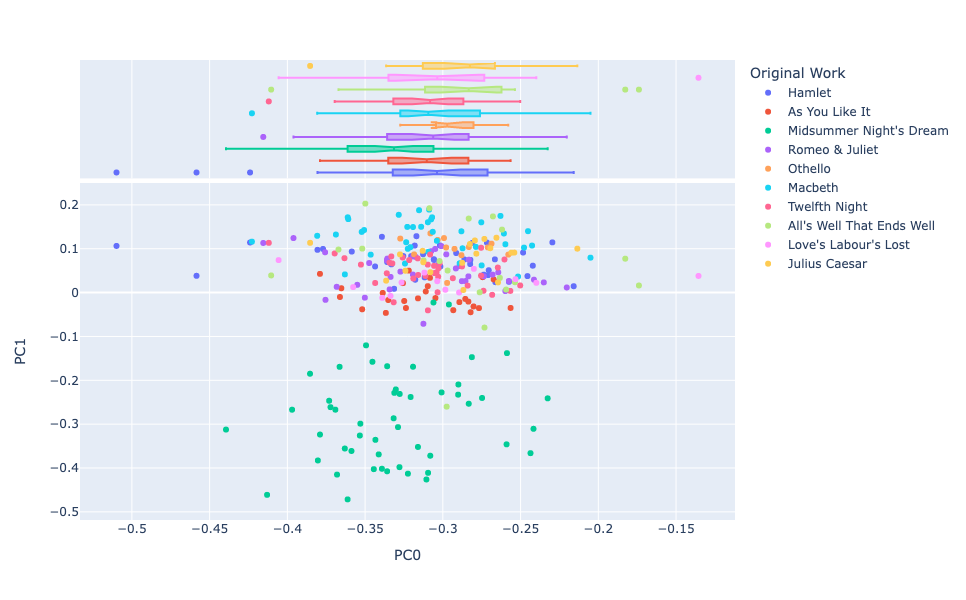

In [29]:
eta_tools.vis_pcs(dcm, 0, 1, label='Original Work', hover_name="Original Work")

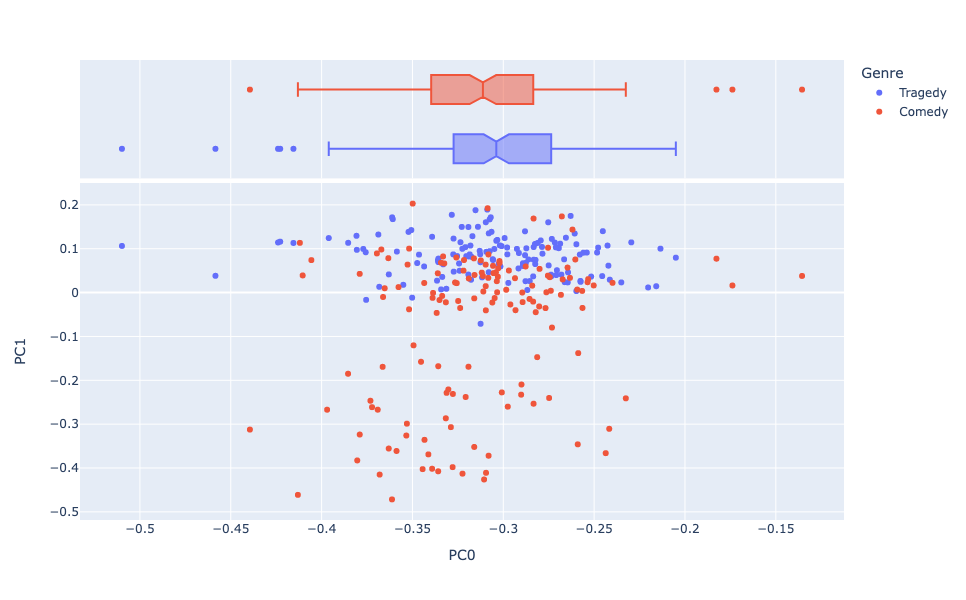

In [30]:
eta_tools.vis_pcs(dcm, 0, 1, label='Genre', hover_name="Original Work")

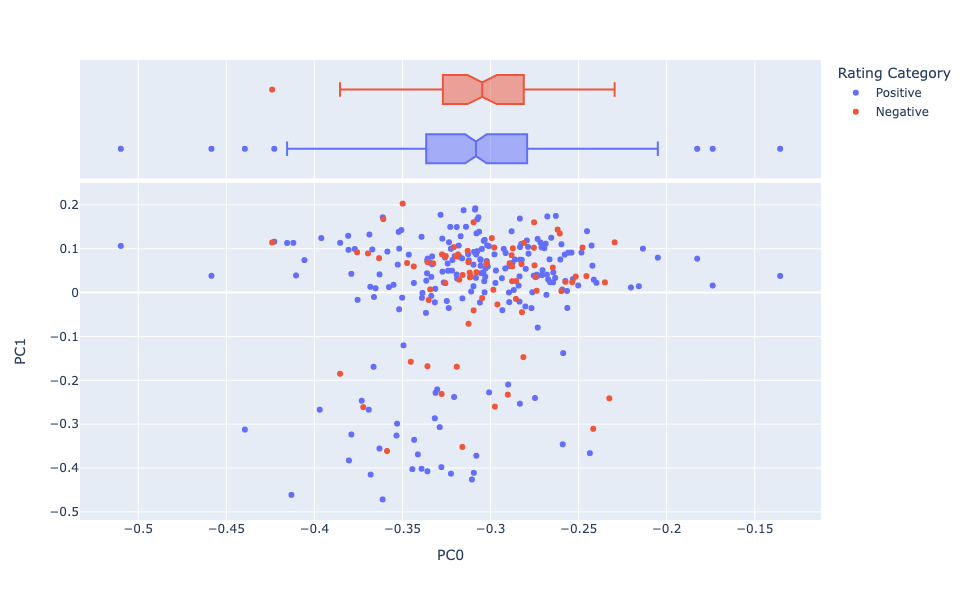

In [31]:
eta_tools.vis_pcs(dcm, 0, 1, label='Rating Category', hover_name="Original Work")

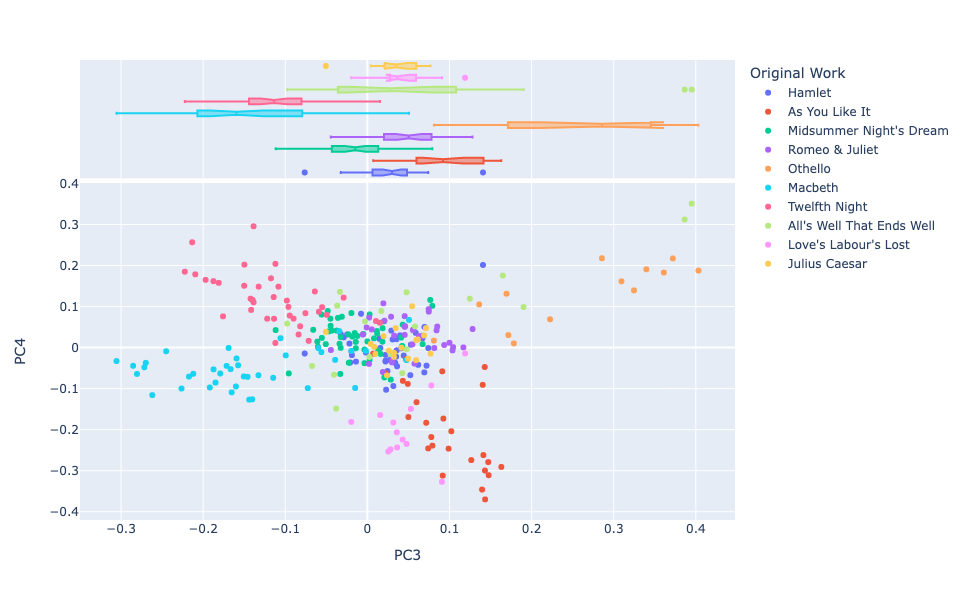

In [32]:
eta_tools.vis_pcs(dcm, 3, 4, label='Original Work', hover_name="Original Work")

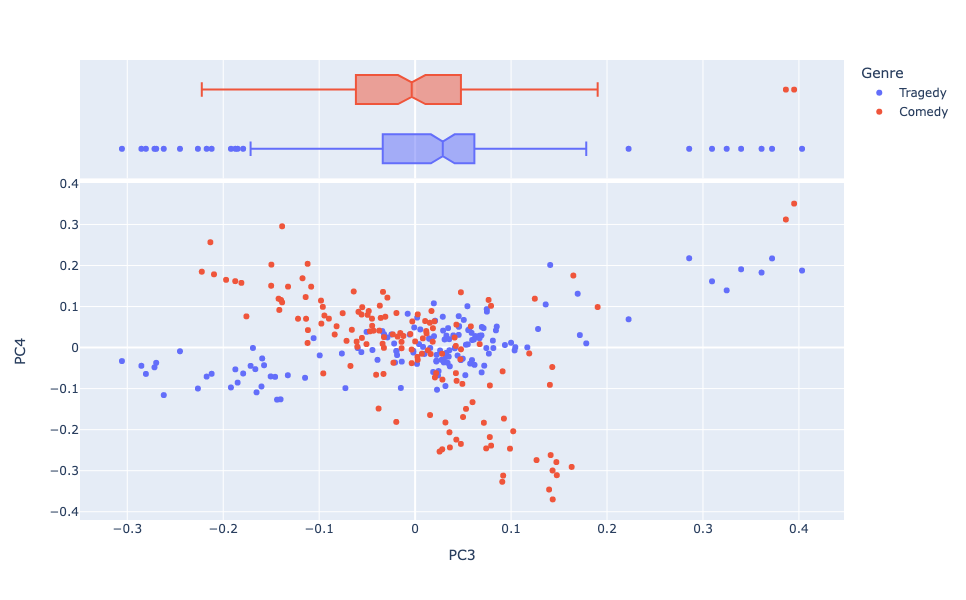

In [33]:
eta_tools.vis_pcs(dcm, 3, 4, label='Genre', hover_name="Original Work")

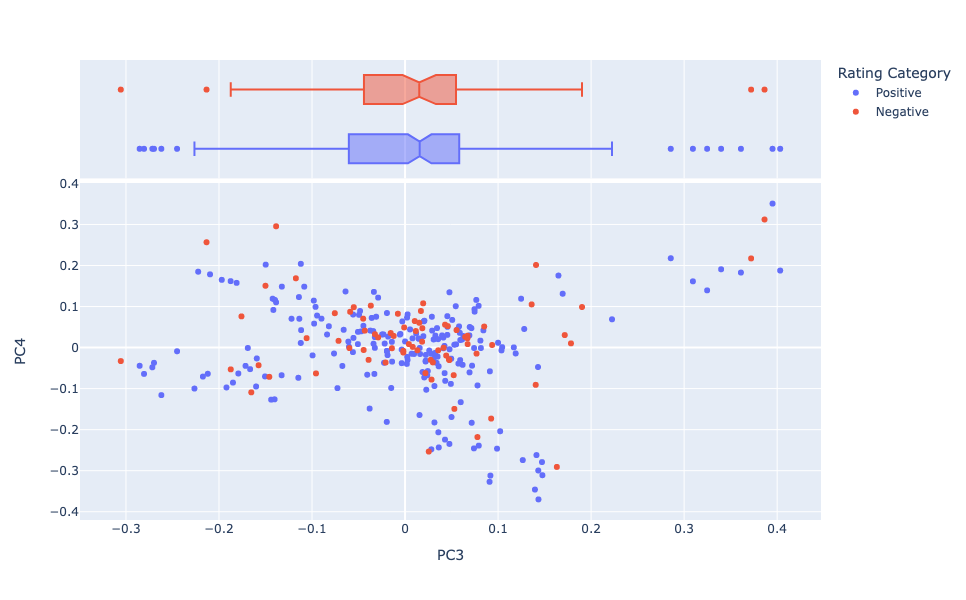

In [34]:
eta_tools.vis_pcs(dcm, 3, 4, label='Rating Category', hover_name="Original Work")

## Word Embeddings

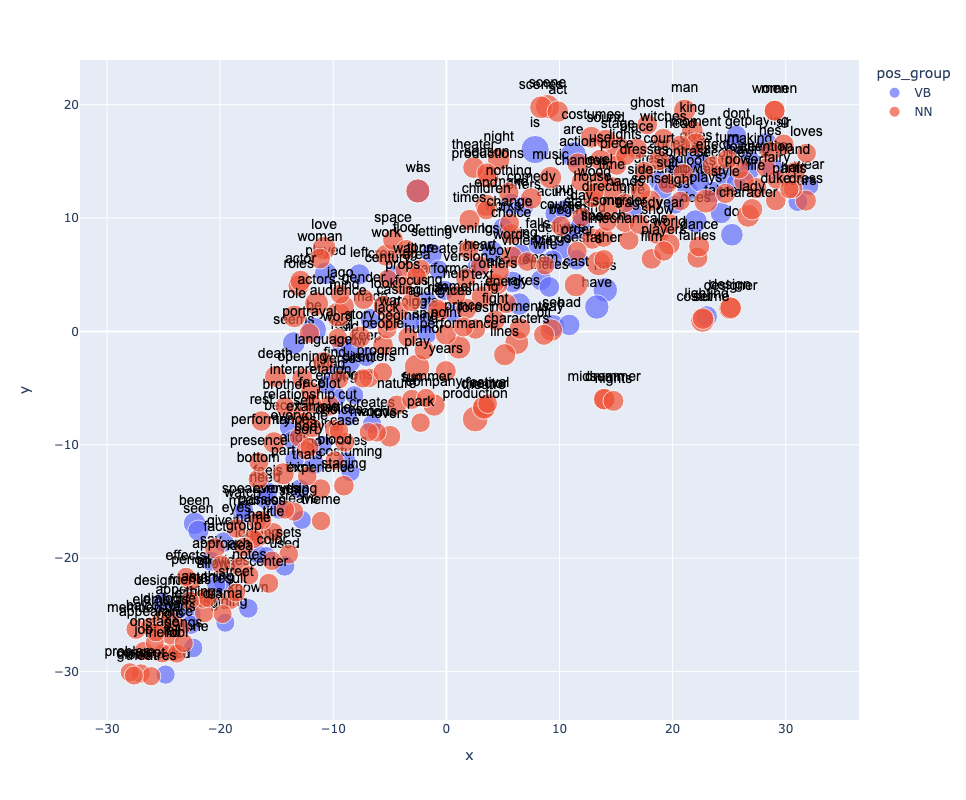

In [38]:
gensim = eta_tools.gensim_corpus(DOC, ['review_id'])

gensim.word2vec(min_count=50)

gensim.generate_coords()

gensim.plot().show()

In [39]:
gensim.get_most_similar("love")

term       sim
0    falls  0.999255
1      man  0.999200
2    woman  0.999184
3        s  0.999140
4  tragedy  0.999130
5      hes  0.999125
6    power  0.999123
7   played  0.999122
8   making  0.999120
9  brother  0.999105

In [37]:
gensim.complete_analogy(A='man', B='actor', C='woman')

term       sim
0    role  0.998246
1  played  0.998167
2   title  0.998149
3    lack  0.998142
4  gender  0.998103